# Import the libraries and the datasets

In [1]:
# Import neccessary librairies
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import sklearn
import os
import cv2
import pickle

In [2]:
# Import the data (images)
image = []
target_name = []
image_data = []
for root, dirs, files in os.walk("C:\\PythonClass\\Data Science\\Datasets\\Facial_Recognition"):
    for folder in dirs:        
        for rot, fold, file in os.walk(root+'\\'+folder):
            for img in file:
                path = root+'\\'+folder+'\\'+img
                target_name.append(os.path.basename(img))
                image.append(path)
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (64, 64))
                image_data.append(img)
print(len(target_name))
print(len(image))
print(len(image_data))

200
200
200


# Feature Engineering of the datasets

In [3]:
# Convert the images to np array
face_id = np.array(image_data)
face_id

array([[[238, 238, 240, ..., 237, 237, 238],
        [238, 239, 239, ..., 238, 237, 238],
        [239, 239, 239, ..., 237, 238, 238],
        ...,
        [100, 137, 104, ..., 103, 119,  95],
        [ 95, 104, 106, ...,  75, 108,  96],
        [ 89, 106, 109, ...,  70,  97,  98]],

       [[240, 241, 240, ..., 236, 236, 236],
        [240, 241, 243, ..., 235, 237, 236],
        [241, 243, 241, ..., 236, 236, 237],
        ...,
        [213, 212, 213, ..., 175, 142, 132],
        [212, 214, 215, ...,  99,  91,  87],
        [212, 213, 212, ..., 100,  95,  93]],

       [[242, 242, 243, ..., 236, 238, 237],
        [243, 244, 244, ..., 239, 238, 238],
        [243, 244, 244, ..., 240, 236, 238],
        ...,
        [207, 206, 207, ...,  72,  74,  94],
        [207, 204, 205, ...,  72,  73,  81],
        [206, 206, 207, ...,  81, 101,  72]],

       ...,

       [[213, 214, 210, ..., 207, 205, 204],
        [213, 215, 215, ..., 206, 206, 207],
        [214, 215, 215, ..., 205, 206, 206

In [4]:
# Check the images shape
face_id.shape

(200, 64, 64)

In [5]:
# Reshape the images shape to 2D
images_array =face_id.reshape(200, 64*64)
images_array

array([[238, 238, 240, ...,  70,  97,  98],
       [240, 241, 240, ..., 100,  95,  93],
       [242, 242, 243, ...,  81, 101,  72],
       ...,
       [213, 214, 210, ..., 206, 181, 187],
       [216, 217, 216, ..., 205, 199, 194],
       [209, 213, 213, ..., 197, 196, 190]], dtype=uint8)

In [6]:
# Check the new shape
print(len(images_array))
images_array.shape

200


(200, 4096)

In [7]:
# Convert the names to array
face_name =np.array(target_name)
face_name

array(['Azeez0.jpg', 'Azeez1.jpg', 'Azeez2.jpg', 'Azeez3.jpg',
       'Azeez4.jpg', 'Azeez5.jpg', 'Azeez6.jpg', 'Azeez7.jpg',
       'Azeez8.jpg', 'Azeez9.jpg', 'Bimbo0.jpg', 'Bimbo1.jpg',
       'Bimbo2.jpg', 'Bimbo3.jpg', 'Bimbo4.jpg', 'Bimbo5.jpg',
       'Bimbo6.jpg', 'Bimbo7.jpg', 'Bimbo8.jpg', 'Bimbo9.jpg',
       'BolanleNinalowo0.jpg', 'BolanleNinalowo1.jpg',
       'BolanleNinalowo2.jpg', 'BolanleNinalowo3.jpg',
       'BolanleNinalowo4.jpg', 'BolanleNinalowo5.jpg',
       'BolanleNinalowo6.jpg', 'BolanleNinalowo7.jpg',
       'BolanleNinalowo8.jpg', 'BolanleNinalowo9.jpg', 'Deyemi0.jpg',
       'Deyemi1.jpg', 'Deyemi2.jpg', 'Deyemi3.jpg', 'Deyemi4.jpg',
       'Deyemi5.jpg', 'Deyemi6.jpg', 'Deyemi7.jpg', 'Deyemi8.jpg',
       'Deyemi9.jpg', 'Dupe0.jpg', 'Dupe1.jpg', 'Dupe2.jpg', 'Dupe3.jpg',
       'Dupe4.jpg', 'Dupe5.jpg', 'Dupe6.jpg', 'Dupe7.jpg', 'Dupe8.jpg',
       'Dupe9.jpg', 'Emman0.jpg', 'Emman1.jpg', 'Emman2.jpg',
       'Emman3.jpg', 'Emman4.jpg', 'Emman5.jpg', 'Emm

In [8]:
# Clean the names
name = []
for i in range(len(face_name)):
    name.append(face_name[i].replace('.jpg',''))
name

['Azeez0',
 'Azeez1',
 'Azeez2',
 'Azeez3',
 'Azeez4',
 'Azeez5',
 'Azeez6',
 'Azeez7',
 'Azeez8',
 'Azeez9',
 'Bimbo0',
 'Bimbo1',
 'Bimbo2',
 'Bimbo3',
 'Bimbo4',
 'Bimbo5',
 'Bimbo6',
 'Bimbo7',
 'Bimbo8',
 'Bimbo9',
 'BolanleNinalowo0',
 'BolanleNinalowo1',
 'BolanleNinalowo2',
 'BolanleNinalowo3',
 'BolanleNinalowo4',
 'BolanleNinalowo5',
 'BolanleNinalowo6',
 'BolanleNinalowo7',
 'BolanleNinalowo8',
 'BolanleNinalowo9',
 'Deyemi0',
 'Deyemi1',
 'Deyemi2',
 'Deyemi3',
 'Deyemi4',
 'Deyemi5',
 'Deyemi6',
 'Deyemi7',
 'Deyemi8',
 'Deyemi9',
 'Dupe0',
 'Dupe1',
 'Dupe2',
 'Dupe3',
 'Dupe4',
 'Dupe5',
 'Dupe6',
 'Dupe7',
 'Dupe8',
 'Dupe9',
 'Emman0',
 'Emman1',
 'Emman2',
 'Emman3',
 'Emman4',
 'Emman5',
 'Emman6',
 'Emman7',
 'Emman8',
 'Emman9',
 'Fathia0',
 'Fathia1',
 'Fathia2',
 'Fathia3',
 'Fathia4',
 'Fathia5',
 'Fathia6',
 'Fathia7',
 'Fathia8',
 'Fathia9',
 'Favour0',
 'Favour1',
 'Favour2',
 'Favour3',
 'Favour4',
 'Favour5',
 'Favour6',
 'Favour7',
 'Favour8',
 'Favour9',


In [9]:
num = np.arange(10)
nam = []
for n in range(0, len(name), 10):
    for i in num:
            nam.append(name[n].strip(str(num)))
print(nam)

['Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Favour', 'Favour', 'Favour', 'Favour', 'Favour', 'Favour', 'Favour', 'Favour', 'Favour', 'Favour', 'FunkeAkindele', 'FunkeAkindele', 'FunkeAkindele', 'FunkeAkindele', 'FunkeAkindele', 'FunkeAkindele', 'FunkeAkindele', 'FunkeAkindele', 'FunkeAkindele', 'Funke

In [10]:
# Convert the cleaned name to array
name = np.array(nam)
name

array(['Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez', 'Azeez',
       'Azeez', 'Azeez', 'Azeez', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo',
       'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo', 'Bimbo',
       'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo',
       'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo',
       'BolanleNinalowo', 'BolanleNinalowo', 'BolanleNinalowo',
       'BolanleNinalowo', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi',
       'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Deyemi', 'Dupe',
       'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe', 'Dupe',
       'Dupe', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman', 'Emman',
       'Emman', 'Emman', 'Emman', 'Emman', 'Fathia', 'Fathia', 'Fathia',
       'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia', 'Fathia',
       'Fathia', 'Favour', 'Favour', 'Favour', 'Favour', 'Favour',
       'Favour', 'Favour', 'Favour', 'Favour', 'Favour', 'FunkeAkindele',
       'FunkeAkindele', 'FunkeAkindele', 'Fun

In [11]:
name.shape

(200,)

# Visualize the datasets

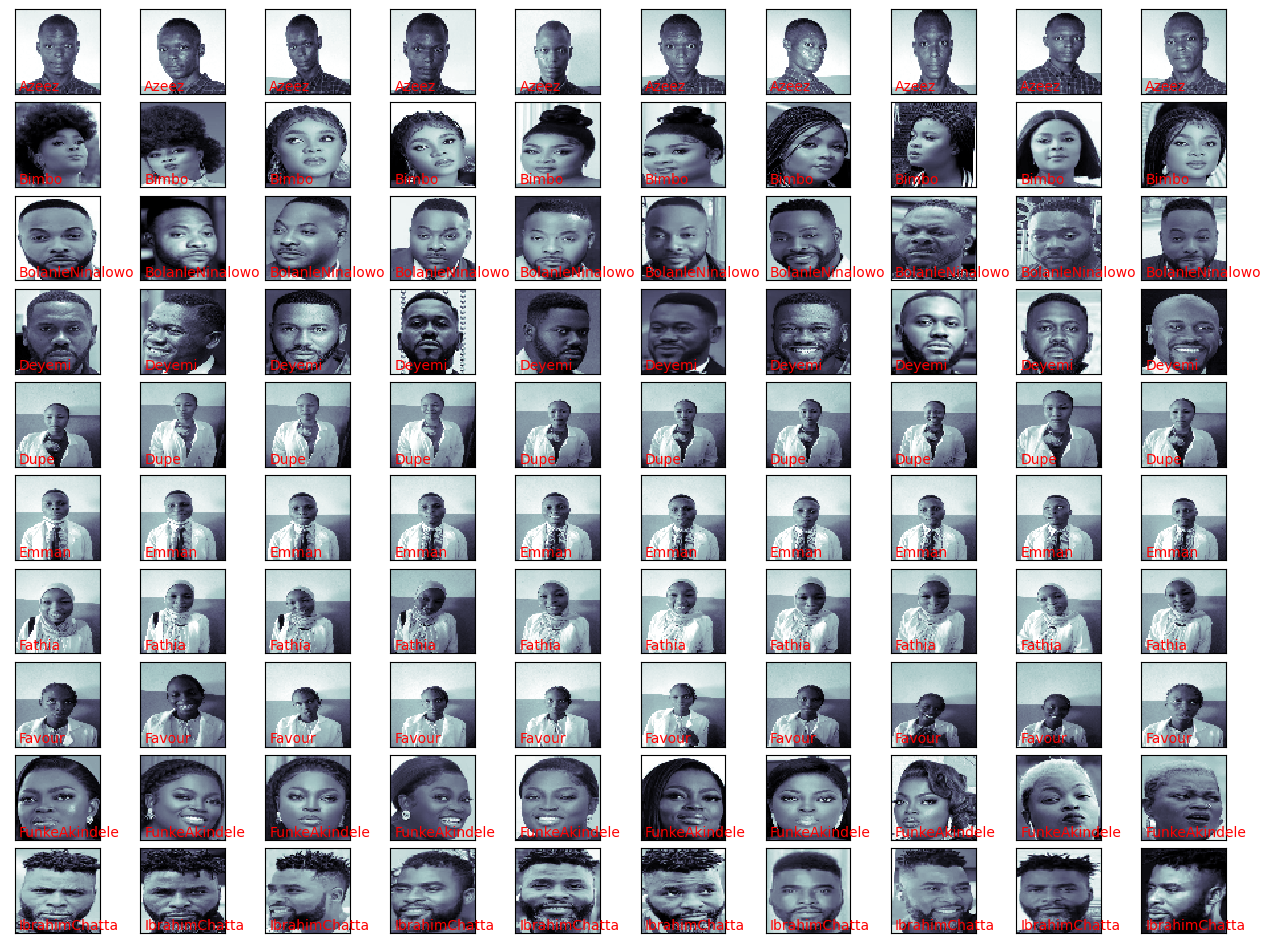

In [12]:
# Plot the images together with the names
fig, axes = plt.subplots(10, 10, figsize=(16, 12), subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(face_id[i], cmap='bone', interpolation='nearest')
    ax.text(0.05, 0.05, str(name[i]),transform=ax.transAxes, color='red')

# Machine Learning

In [13]:
# Encode the target (names)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
array_name = labelencoder.fit_transform(name)

In [14]:
print(array_name)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19]


In [15]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(images_array, array_name, random_state=42, train_size=0.8)

In [16]:
# we can scale the data, meaning the data will be within a specific range, for example 0–100 or 0–1.
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [18]:
# Deploy Suport Vector Regressor (SVR) model and evaluate the model using mean absolute error
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error
sv_reg = SVR()
sv_reg.fit(Xtrain, ytrain)
y_pred = sv_reg.predict(Xtest)
print("MAE",mean_absolute_error(ytest,y_pred))

MAE 3.4676336435574955


In [20]:
#save the model
filename = 'face_model.sav'
face_model = pickle.dump(sv_reg, open(filename, 'wb'))